## Data And Packages Loading

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

In [ ]:
# Loading Data
data = pd.read_csv('XYZCorp_LendingData.txt', sep = '\t', na_values = None)

In [ ]:
data.head(3)

In [ ]:
# Dropping ['id', 'member_id'] as it will not play important role into model building process.
print('Before Dropping Shape of Data :{}'.format(data.shape))
data.drop(['id', 'member_id'],inplace = True, axis = 1)
print('After Dropping Shape of Data :{}'.format(data.shape))

## Data Preprocessing

#### Checking for NA values And Fill NA's or NAN's values with appropriate Values

In [ ]:
# Method for getting NA values
drop_columns = []

def get_na(data): 
    null_vars = data.isnull().sum()
    null_vars = null_vars[null_vars > 0]
    if(len(null_vars) > 0):
        null_vars.sort_values(inplace=True)
        print(str(null_vars/data.shape[0] * 100))
        # null_vars.plot.bar(figsize=(15,4))
    else:
        print("No column have NA values")

In [ ]:
get_na(data)

In [ ]:
## Removing Columns those are having more than 70% missing data
drop_columns_list = ['mths_since_last_major_derog', 'mths_since_last_record','desc',
                     'inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','total_bal_il','open_il_24m',
                     'open_il_12m','open_il_6m','open_acc_6m','total_cu_tl','inq_last_12m','mths_since_rcnt_il',
                     'il_util','verification_status_joint','annual_inc_joint','dti_joint']

In [ ]:
len(drop_columns_list)

In [ ]:
# Dropping Columns those having more than 70% NA Values
print('Before Dropping Shape of Data :{}'.format(data.shape))
data.drop(drop_columns_list, inplace = True, axis = 1)
print('After Dropping Shape of Data :{}'.format(data.shape))

In [ ]:
# zip_code
data.zip_code.head()

In [ ]:
# We are dropping zip_code as it can't be use into model building
data.drop('zip_code', inplace = True, axis = 1)

In [ ]:
# Reviewing policy_code Column
data.policy_code.head()

In [ ]:
data.policy_code.value_counts()

In [ ]:
# We are dropping policy_code as it only have one label for entire dataset that will lead to bias into model
data.drop('policy_code', inplace = True, axis = 1)

In [ ]:
# emp_title - The job title supplied by the Borrower when applying for the loan.
data.emp_title.head()

In [ ]:
data.emp_title.value_counts()

In [ ]:
# Dropping emp_title as it is having 290912 lables and it will not impact on model.
data.drop('emp_title',inplace = True, axis = 1)

In [ ]:
# Treatment for emp_length - Employment length in years.
data.emp_length.head()

In [ ]:
data.emp_length = data.emp_length.str.replace(r'\D', '')
data.emp_length.head()

In [ ]:
data.emp_length.value_counts()

In [ ]:
data.emp_length.isna().sum()

In [ ]:
# Filling NA values
data.emp_length.fillna(10, inplace = True)
# Change Datatype of variable to numeric as it is represanting no of years
data.emp_length = data.emp_length.astype('int32')
data.emp_length.dtype

In [ ]:
# Treatment for term Variable - The number of payments on the loan. Values are in months and can be either 36 or 60.
data.term.head

In [ ]:
data.term.value_counts()

In [ ]:
# last_credit_pull_d - The most recent month XYZ corp. pulled credit for this loan
data.last_credit_pull_d.head()

In [ ]:
# next_pymnt_d - Next scheduled payment date
data.next_pymnt_d.head()

In [ ]:
# earliest_cr_line - The month the borrower's earliest reported credit line was opened
data.earliest_cr_line.head()

In [ ]:
# Dropping Time Variables (Dates) from dataset
date_cols = ['last_credit_pull_d', 'next_pymnt_d', 'earliest_cr_line']
data.drop(date_cols,inplace = True, axis = 1)

In [ ]:
data.shape

In [ ]:
# title - The loan title provided by the borrower
data.title.head()

In [ ]:
# Dropping title as it can be anything.
data.drop('title',inplace = True, axis = 1)

In [ ]:
# verification_status - Was the income source verified
data.verification_status.head()

In [ ]:
# Mapping and Set Lable for 'Source Verified' to 'Verified'
data.verification_status = data.verification_status.map({'Verified': 'Verified', 'Source Verified': 'Verified', 
                                                         'Not Verified':'Not Verified'})

In [ ]:
data.verification_status.head()

In [ ]:
# application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
data.application_type.head()

In [ ]:
data.application_type.value_counts()

In [ ]:
# addr_state - The state provided by the borrower in the loan application
data.addr_state.head()

In [ ]:
print('Total No of values for state : {}'.format(len(data.addr_state.value_counts())))

In [24]:
# purpose - A category provided by the borrower for the loan request
data.purpose.head()

0    debt_consolidation
1                 Other
2    debt_consolidation
3                 Other
4           credit_card
Name: purpose, dtype: object

In [25]:
data.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
Other                 150433
Name: purpose, dtype: int64

In [ ]:
data.purpose = data.purpose.map({'debt_consolidation': 'debt_consolidation','credit_card':'credit_card',
'home_improvement':'Other', 'major_purchase':'Other', 'small_business':'Other', 'car':'Other', 'medical':'Other', 
'moving':'Other','vacation':'Other', 'house':'Other', 'wedding':'Other', 'renewable_energy':'Other', 'educational':'Other'})

In [ ]:
data.purpose.value_counts()

In [ ]:
data.purpose.isna().sum()

In [ ]:
data.purpose.fillna('Other', inplace = True)

In [ ]:
# loan_amnt - The listed amount of the loan applied for by the borrower.
data.loan_amnt.head()

In [ ]:
# home_ownership - The home ownership status provided by the borrower during registratio
data.home_ownership.head()

In [ ]:
data.home_ownership.value_counts()

In [ ]:
# Replacing OTHER , NONE , ANY to Other for Reducing Columns while Dummy Coding
data.home_ownership = data.home_ownership.map({'MORTGAGE':'Mortgage', 'RENT': 'Rent', 'OWN':'Own', 'OTHER':'Other', 
                                               'NONE': 'Other','ANY':'Other' })

In [ ]:
data.home_ownership.value_counts()

In [ ]:
# grade - Assigned loan grade
data.grade.head()

In [ ]:
# sub_grade - Assigned loan sub_grade
data.sub_grade.head()

In [ ]:
# Grade and Sub_grade are similar kind of factor. In this case Sub_grade can be better parameter to consider into model building process. So, we can remove Grade from dataset.
data.drop('grade',inplace = True, axis = 1)

In [ ]:
# open_acc - The number of open credit lines in the borrower's credit file.
data.open_acc.head()

In [ ]:
# Converting Datatype of open_acc as it is representing numbers
data.open_acc = data.open_acc.astype('int32')
data.open_acc.dtype

In [ ]:
# delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
data.delinq_2yrs.head()

In [ ]:
# Converting Datatype of delinq_2yrs as it is showing numbers
data.delinq_2yrs = data.delinq_2yrs.astype('int32')
data.delinq_2yrs.dtype

In [ ]:
# inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
data.inq_last_6mths.head()

In [ ]:
# Converting Datatype of delinq_2yrs as it is showing numbers
data.inq_last_6mths = data.inq_last_6mths.astype('int32')
data.inq_last_6mths.dtype

In [ ]:
# funded_amnt - The total amount committed to that loan at that point in time.
data.funded_amnt.head()

In [ ]:
# funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
data.funded_amnt_inv.head()

In [ ]:
# int_rate - Interest Rate on the loan
data.int_rate.head() 

In [ ]:
# installment - The monthly payment owed by the borrower if the loan originates.
data.installment.head()

In [ ]:
# annual_inc - The self-reported annual income provided by the borrower during registration.
data.annual_inc.head()

In [ ]:
# issue_d - The month which the loan was funded
data.issue_d.head()

In [ ]:
# pymnt_plan - Indicates if a payment plan has been put in place for the loan
data.pymnt_plan.head()

In [ ]:
data.pymnt_plan.value_counts()

In [ ]:
# We can't consider pymnt_plan column as it is showing same value for almost all records
data.drop('pymnt_plan', axis = 1, inplace= True)

In [ ]:
# dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
# excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
data.dti.head()

In [ ]:
# pub_rec - Number of derogatory public records
data.pub_rec.head()

In [ ]:
data.pub_rec.value_counts()

In [ ]:
#Feature Engineering for pub_rec. If Number of derogatory public records is less than 3 will go for good else go in fever of bad
data.pub_rec = np.where(data.pub_rec <= 2, 'Good', 'Bad')

In [ ]:
# revol_bal - Total credit revolving balance
data.revol_bal.head()

In [ ]:
# revol_util - Revolving line utilization rate, or 
# the amount of credit the borrower is using relative to all available revolving credit.
data.revol_util.head()

In [ ]:
data.revol_util.fillna(data.revol_util.mean(),inplace = True )

In [ ]:
data.revol_util.isna().sum()

In [ ]:
# total_acc - The total number of credit lines currently in the borrower's credit file
data.total_acc.head()

In [ ]:
# out_prncp - Remaining outstanding principal for total amount funded
data.out_prncp.head()

In [ ]:
# out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
data.out_prncp_inv.head()

In [ ]:
# total_pymnt - Payments received to date for total amount funded
data.total_pymnt.head()

In [ ]:
# total_pymnt_inv - Payments received to date for portion of total amount funded by investors
data.total_pymnt_inv.head()

In [ ]:
# total_rec_prncp - Principal received to date
data.total_rec_prncp.head()

In [ ]:
# total_rec_int - Interest received to date
data.total_rec_int.head()

In [ ]:
# collection_recovery_fee - post charge off collection fee
data.collection_recovery_fee.head()

In [ ]:
# recoveries - post charge off gross recovery
data.recoveries.head()

In [ ]:
# last_pymnt_d - Last month payment was received
data.last_pymnt_d.head()

In [ ]:
data.drop('last_pymnt_d', inplace = True, axis = 1)

In [ ]:
# last_pymnt_amnt - Last total payment amount received
data.last_pymnt_amnt.head()

In [ ]:
# collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections
data.collections_12_mths_ex_med.head()

In [ ]:
data.collections_12_mths_ex_med.fillna(round(data.collections_12_mths_ex_med.mean(),2), inplace = True)

In [ ]:
# acc_now_delinq - The number of accounts on which the borrower is now delinquent.
data.acc_now_delinq.head()

In [ ]:
# tot_coll_amt - Total collection amounts ever owed
data.tot_coll_amt.head()

In [ ]:
data.tot_coll_amt.fillna(round(data.tot_coll_amt.mean(),2), inplace = True)

In [ ]:
# tot_cur_bal - Total collection amounts ever owed
data.tot_cur_bal.head()

In [ ]:
data.tot_cur_bal.fillna(round(data.tot_cur_bal.mean(),2), inplace = True)

In [ ]:
data.tot_cur_bal.isna().sum()

In [ ]:
# total_rev_hi_lim - Total revolving high credit/credit limit
data.total_rev_hi_lim.tail()

In [ ]:
data.total_rev_hi_lim.fillna(round(data.total_rev_hi_lim.mean(),2), inplace = True)

In [ ]:
# mths_since_last_delinq - The number of months since the borrower's last delinquency.
data.mths_since_last_delinq.head()

In [ ]:
data.mths_since_last_delinq.fillna(0,inplace= True)

### List of Columns having NA values

In [ ]:
get_na(data)

In [ ]:
# Sorting Data according to issue_d column
data.issue_d = pd.to_datetime(data.issue_d)
data = data.set_index(data.issue_d)
data = data.sort_index()

# Dropping issue_d as it is not required now
data.drop('issue_d', axis = 1, inplace = True)

In [ ]:
data.head()

In [ ]:
data.columns

In [7]:
# Devide Categorical And Numerical Data
cat_data = data.select_dtypes('O')
num_data = data.drop(cat_data, axis=1)

In [ ]:
cat_data.head()

In [ ]:
num_data.head()

## EDA - Exploratory Data Analysis

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### EDA for Categorical Variables

In [ ]:
cat_data.columns

In [53]:
sns.countplot(data = cat_data, x = 'application_type')

ValueError: Could not interpret input 'application_type'

In [ ]:
# application_type is not having sufficient Joint Label cases so We can Drop it
data.drop('application_type', axis= 1, inplace = True)

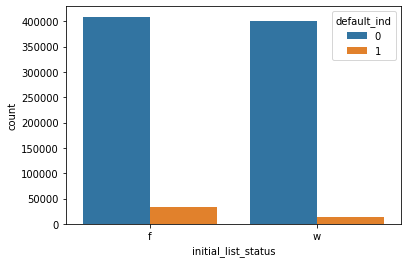

In [56]:
sns.countplot(data = data, x = 'initial_list_status', hue="default_ind")

In [ ]:
sns.countplot(data = cat_data, x = 'pub_rec')

In [ ]:
# pub_rec is not having sufficient Joint Label cases so We can Drop it
data.drop('pub_rec', axis= 1, inplace = True)

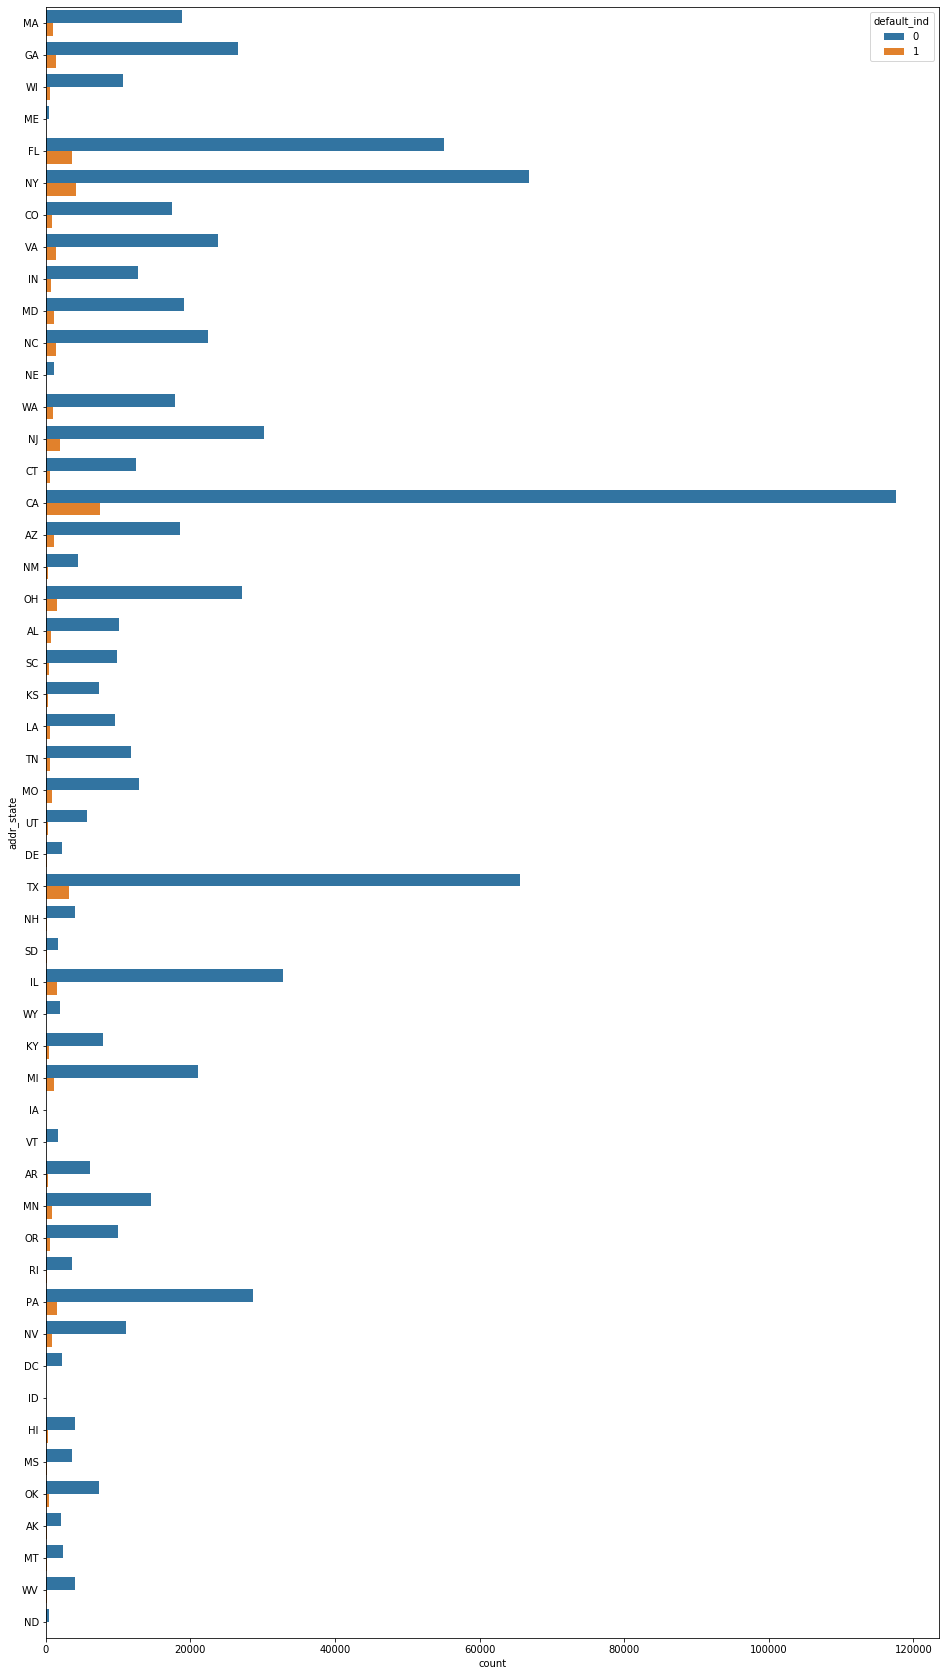

In [61]:
plt.figure(figsize=(16,30))
sns.countplot(data = data, y = 'addr_state', hue="default_ind")

In [62]:
# We can Drop addr_state columns as it is not significant.
data.drop('addr_state', axis = 1 , inplace = True)

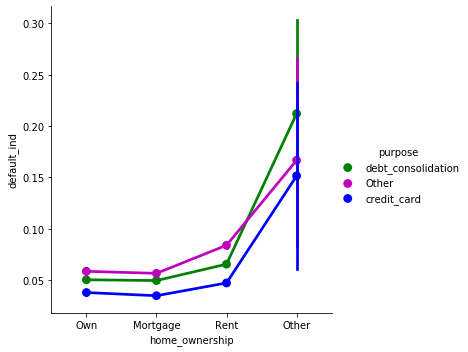

In [27]:
sns.catplot(x="home_ownership", y="default_ind", hue="purpose", 
            palette={"debt_consolidation": "g", "Other": "m", "credit_card":"b"}, 
            markers=["o", "o", "o"], linestyles=["-", "-","-"], kind="point", data=data)

In [ ]:
sns.countplot(data = cat_data, x = 'purpose')

In [ ]:
sns.countplot(data = cat_data, x = 'verification_status')

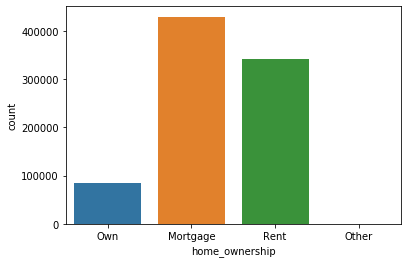

In [8]:
sns.countplot(data = cat_data, x = 'home_ownership')

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = cat_data, x = 'sub_grade')

In [ ]:
# Catplot Sub_Grade(Counts) vs Default_Ind
g = sns.factorplot(x="default_ind", data = data, hue="sub_grade", kind="count")

## EDA for Numerical Variable

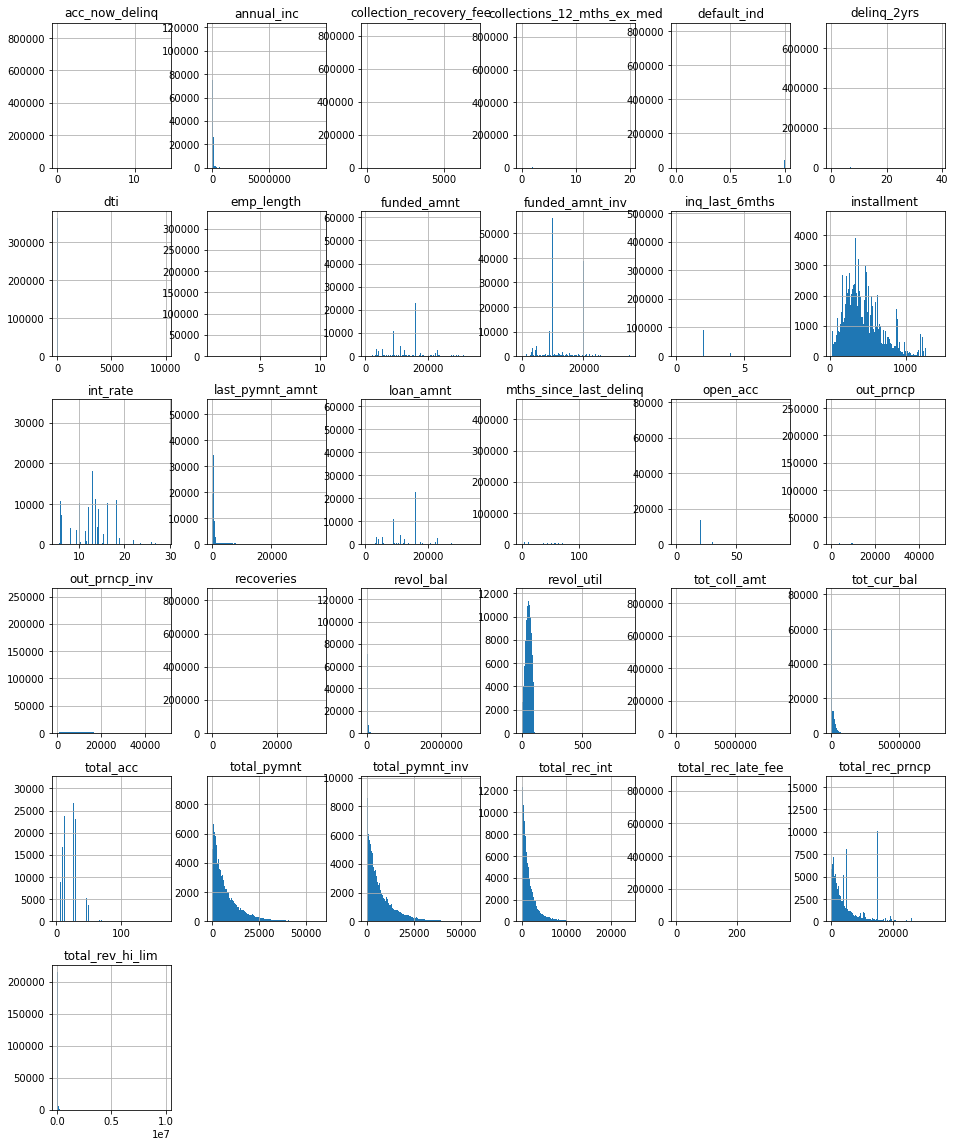

In [43]:
# Checking Skewness
num_data.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);

### References: 
* https://seaborn.pydata.org/
    * https://seaborn.pydata.org/tutorial/categorical.html
* https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
* https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
* https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

In [ ]:
num_data.columns

In [ ]:
data.to_csv('dataset/ref_data.csv')

In [2]:
# data = pd.read_csv('dataset/ref_data.csv')

In [ ]:
# data.head(3)